# Data Explodation
Notebook for exploring the problem in the input data

In [50]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Shipments

In [40]:
df = pd.read_csv('../data/01_raw/shipments.csv')
df['time_var'] = pd.to_datetime(df['time_var']) # Change to timestamp

### columns

In [41]:
df.columns.to_list()

['prod_code', 'customer', 'location', 'category', 'time_var', 'shipments']

### customer

In [42]:
df['customer'].drop_duplicates()

0            ALDI
155          lidl
310          LIDL
464            bm
618        EROSKI
926          aldi
1082       Eroski
2718           BM
2874    Mercadona
3647       eroski
Name: customer, dtype: object

### location

In [43]:
df['location'].drop_duplicates()

0      sansebastian
310         Vitoria
464          bilbao
Name: location, dtype: object

### Number of datapoint
Let's count the number of shipments

In [44]:
df[['prod_code', 'customer', 'location']].value_counts()

prod_code  customer   location    
5069_01    Mercadona  sansebastian    156
6860_07    Mercadona  Vitoria         156
2093_01    Mercadona  bilbao          156
2241_05    LIDL       sansebastian    156
2441_04    LIDL       sansebastian    156
9340_08    LIDL       sansebastian    156
2496_04    LIDL       Vitoria         156
6258_07    ALDI       bilbao          156
3590_01    EROSKI     Vitoria         156
3677_04    aldi       Vitoria         156
5848_02    EROSKI     Vitoria         156
7638_05    lidl       sansebastian    156
8526_03    LIDL       bilbao          156
1466_03    BM         sansebastian    156
9876_02    bm         bilbao          155
6250_05    Eroski     bilbao          155
8684_05    ALDI       sansebastian    155
4758_08    Mercadona  Vitoria         155
8684_05    lidl       sansebastian    155
3735_01    LIDL       Vitoria         155
3186_03    lidl       sansebastian    155
1522_03    Eroski     Vitoria         155
4888_03    bm         bilbao          154

/home/pepsico/.local/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



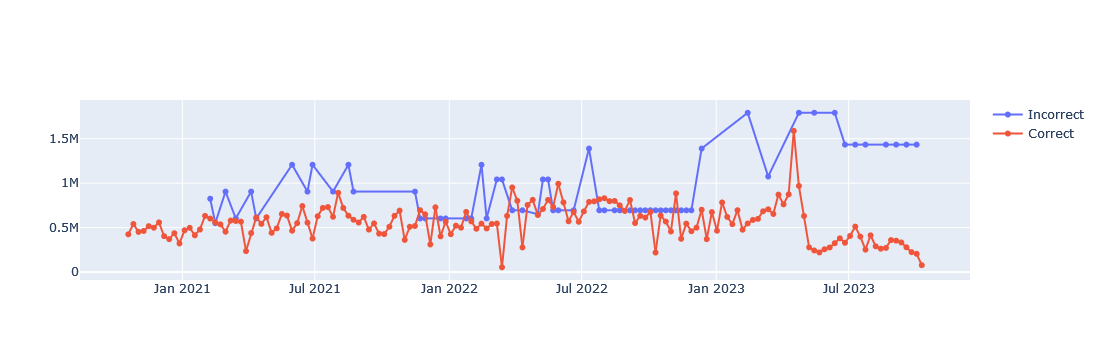

In [81]:
wrong_df = df[df['prod_code'] == '2493_07']
wrong_df = wrong_df.sort_values('time_var')
wrong_df['time_var'].to_list()

corr_df = df[df['prod_code'] == '5069_01']
corr_df = corr_df.sort_values('time_var')
corr_df['time_var'].to_list()

fig = go.Figure()

# Wrong data
fig.add_trace(go.Scatter(x=inspect_df['time_var'], y=inspect_df['shipments'],
                    mode='lines+text+markers', name='Incorrect'))

fig.add_trace(go.Scatter(x=corr_df['time_var'], y=corr_df['shipments'],
                    mode='lines+text+markers', name='Correct'))

fig.show()

In [103]:
corr_df['time_var'].dt.month

4911    10
4975    10
4966    11
4917    11
5020    11
        ..
4899     9
4977     9
5005     9
4946    10
4971    10
Name: time_var, Length: 156, dtype: int32

In [89]:
pd.get_dummies(corr_df['time_var'].dt.isocalendar().week, drop_first=True, prefix="week")

,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,week_10,week_11,...,week_44,week_45,week_46,week_47,week_48,week_49,week_50,week_51,week_52,week_53
4911,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4975,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4966,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4917,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
5020,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4899,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4977,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5005,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4946,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [93]:
corr_df['time_var'].dt.isocalendar().week

4911    43
4975    44
4966    45
4917    46
5020    47
        ..
4899    37
4977    38
5005    39
4946    40
4971    41
Name: week, Length: 156, dtype: UInt32

In [76]:
corr_df

,prod_code,customer,location,category,time_var,shipments,month
4911,5069_01,Mercadona,sansebastian,snack,2020-10-19 00:00:00+00:00,424899,10
4975,5069_01,Mercadona,sansebastian,snack,2020-10-26 00:00:00+00:00,540495,10
4966,5069_01,Mercadona,sansebastian,snack,2020-11-02 00:00:00+00:00,452246,11
4917,5069_01,Mercadona,sansebastian,snack,2020-11-09 00:00:00+00:00,462442,11
5020,5069_01,Mercadona,sansebastian,snack,2020-11-16 00:00:00+00:00,516311,11
...,...,...,...,...,...,...,...
4899,5069_01,Mercadona,sansebastian,snack,2023-09-11 00:00:00+00:00,333641,9
4977,5069_01,Mercadona,sansebastian,snack,2023-09-18 00:00:00+00:00,278923,9
5005,5069_01,Mercadona,sansebastian,snack,2023-09-25 00:00:00+00:00,224332,9
4946,5069_01,Mercadona,sansebastian,snack,2023-10-02 00:00:00+00:00,205503,10
